# Clustering using k-means

---
*Algorithm*

---

* Start with _k_ initial clusters
* At every stage, each observation is assigned to the cluster with the closest centroid
* Recompute the centroid of clusters that lost or gained a record and repeat step 2 (previous step)
* Stop when moving any more records between clusters increases cluster dispersion
___

[K-means visualization](http://shabal.in/visuals/kmeans/1.html) -- External link




## Create a Pandas dataframe with random values

We need data for clustering. Let us use [Scikit Learn Dataset Loading Utilities](http://scikit-learn.org/stable/datasets/)

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

# Number of data items generated
number_of_samples = 100 
number_of_clusters = 3

#X, y = make_blobs(n_samples=number_of_samples, centers=number_of_clusters,
#                random_state=0, cluster_std=0.60)


#data = pd.concat( [pd.DataFrame( X ), pd.DataFrame( y ) ], axis = 1 )

#data.columns = ["Height", "Weight", "Group"]
#data.head()

## Alternate way of generating data

In [3]:
height = np.random.randint(24, 36, size=45).tolist()
height = height + np.random.randint(48, 72, size=45).tolist() 
height = height + np.random.randint(72, 120, size=10).tolist()    

weight = np.random.randint(10, 30, size=45).tolist()
weight = weight + np.random.randint(50, 80, size=45).tolist()
weight = weight + np.random.randint(40, 120, size=10).tolist()

group = [0] * 45 + [1]*45 + [2] * 10

data = pd.DataFrame({'Height': height, 'Weight': weight, 'Group': group })
data[:5]

,Group,Height,Weight
0,0,26,15
1,0,26,28
2,0,35,23
3,0,29,22
4,0,28,19


## Data Exploration and Visualization
### Exploration

In [3]:
data.head()

,Group,Height,Weight
0,0,24,19
1,0,26,12
2,0,34,10
3,0,27,12
4,0,28,23


In [4]:
data.tail()

,Group,Height,Weight
95,2,72,85
96,2,104,115
97,2,82,80
98,2,99,114
99,2,117,78


In [5]:
data.mean()

Group      0.65
Height    49.54
Weight    46.11
dtype: float64

In [46]:
data.max()

Group       2
Height    115
Weight    108
dtype: int64

In [47]:
data.min()

Group      0
Height    24
Weight    10
dtype: int64

### Visualization

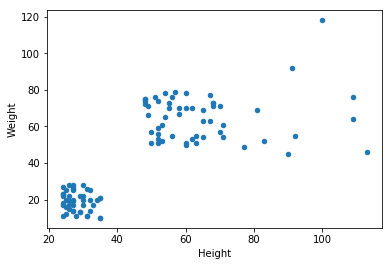

In [63]:
%matplotlib inline

data.plot(kind='scatter', x='Height', y='Weight');

## Cluster the data

In [64]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = number_of_clusters)
model.fit(data[ ["Height", "Weight"] ] )

## Add cluster number to data frame
data['Cluster'] = model.labels_
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [65]:
model.cluster_centers_

array([[ 28.26666667,  19.04444444],
       [ 58.52173913,  64.54347826],
       [ 96.44444444,  68.55555556]])

## Visualize the results

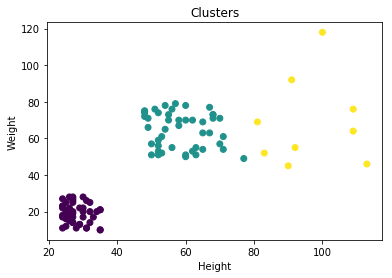

In [66]:
import matplotlib.pyplot as plt

plt.scatter(data['Height'], data['Weight'], c = data['Cluster'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusters")
#data.plot(kind='scatter', x='Height', y='Weight', c='Cluster');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ff7e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1180d2390>], dtype=object)

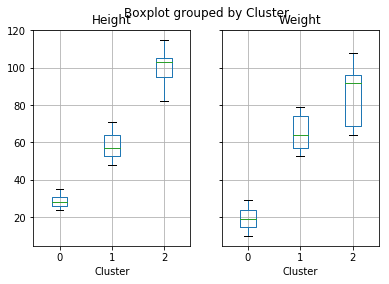

In [60]:
data.boxplot(by='Cluster', column=['Height', 'Weight'])

### Silhouette Coefficient

<blockquote>
  <p>a: The mean distance between a sample and all other points in the same class. </p>
  
  <p>b: The mean distance between a sample and all other points in the next
  nearest cluster.</p>
</blockquote>

The Silhouette Coefficient s for a single sample is then given as:

$s = \frac{b-a}{max(a,b)} $

The silhouete score is the average of the silhouette coefficient for all the points.


In [61]:
from sklearn.metrics import silhouette_score
silhouette_score(data[ ["Height", "Weight"] ], data['Cluster'])

0.7560088415714481

### Prediction using kmeans

Let us generate 10 random samples and predict their clusters. To predict the cluster for a new data item the distance of the data from all the cluster centroids is chosen and then the data item is assigned to the cluster centroid to which its distance is minimal. Typically Euclidean distance is used. KMeans has an inbuild function to do this and we will use that.

In [68]:
height = np.random.randint(24, 36, size=4).tolist()
height = height + np.random.randint(48, 72, size=4).tolist() 
height = height + np.random.randint(72, 120, size=2).tolist()    

weight = np.random.randint(10, 30, size=4).tolist()
weight = weight + np.random.randint(50, 80, size=4).tolist()
weight = weight + np.random.randint(40, 120, size=2).tolist()

group = [0]*4 + [1]*4 + [2]*2

test_data = pd.DataFrame({'Height': height, 'Weight': weight, 'Group': group })
test_data[:5]

,Group,Height,Weight
0,0,34,21
1,0,30,14
2,0,33,16
3,0,28,29
4,1,48,58


In [71]:
predicted_labels = model.predict(test_data[['Height', 'Weight']])
test_data['Cluster'] = predicted_labels
predicted_labels

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2], dtype=int32)

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Typically row is actual value and column is predicted value.

In [73]:
# Confusion Matrix
pd.crosstab(test_data.Group, test_data.Cluster, margins=True)

Cluster,0,1,2,All
Group,,,,
0,4,0,0,4
1,0,4,0,4
2,0,0,2,2
All,4,4,2,10


## The End